In [1]:
# from IPython.display import HTML
# HTML('''
# <script>
#     var code_show=true; //true -> hide code at first

#     function code_toggle() {
#         $('div.prompt').hide(); // always hide prompt

#         if (code_show){
#             $('div.input').hide();
#         } else {
#             $('div.input').show();
#         }
#         code_show = !code_show
#     }
#     $( document ).ready(code_toggle);
# </script>
# ''')

In [2]:
# HTML('''
# <a href="javascript:code_toggle()">[Versão impressa]</a>
# ''')

In [3]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
tabela = pd.read_excel('trxselic.xlsx')
tabela.columns = ['Data', 'TR', 'Selic','Relacao']
variacao_selic = []
variacao_tr = []
for i, taxa in enumerate(tabela['Selic']):
    if i == 0:
        variacao_selic.append(0)
        continue
    if tabela['Selic'][i -1] == 0:
        variacao_selic.append(0)
        continue
    v = ((tabela['Selic'][i] / tabela['Selic'][i -1]) - 1)*100
    variacao_selic.append(v)
    
for i, taxa in enumerate(tabela['TR']):
    if i == 0:
        variacao_tr.append(0)
        continue
    if tabela['TR'][i -1] == 0:
        variacao_tr.append(0)
        continue
    v = ((tabela['TR'][i] / tabela['TR'][i -1]) - 1)*100
    variacao_tr.append(v)
tabela['Var_TR'] = variacao_tr    
tabela['Var_Selic'] = variacao_selic
tabela['Relacao'] = tabela['Relacao'] * 100

In [35]:
tabela

,Data,TR,Selic,Relacao,Var_TR,Var_Selic
0,2010-01-01,0.0000,0.6706,0.000000,0.000000,0.000000
1,2010-02-01,0.0000,0.6034,0.000000,0.000000,-10.020877
2,2010-03-01,0.0792,0.7716,10.264386,0.000000,27.875373
3,2010-04-01,0.0000,0.6761,0.000000,-100.000000,-12.376879
4,2010-05-01,0.0510,0.7622,6.691157,0.000000,12.734803
...,...,...,...,...,...,...
91,2017-08-01,0.0509,0.8107,6.278525,-18.298555,0.645562
92,2017-09-01,0.0000,0.6458,0.000000,-100.000000,-20.340447
93,2017-10-01,0.0000,0.6228,0.000000,0.000000,-3.561474
94,2017-11-01,0.0000,0.5756,0.000000,0.000000,-7.578677


In [59]:
resumo = pd.DataFrame(round(tabela.query('TR != 0')['Relacao'].describe(),2))
resumo.columns = ['Relacao TR x Selic (%)']
resumo = resumo[1:]
resumo.index = ['Média','Desvio padrão', 'Mínimo', '25%', '50%','75%','Máximo']
display(resumo)

,Relacao TR x Selic (%)
Média,10.24
Desvio padrão,4.92
Mínimo,1.10
25%,6.42
50%,10.26
75%,13.70
Máximo,20.80


Text(0.5, 1.0, 'Distribuição da relação entre Selic e TR (%)')

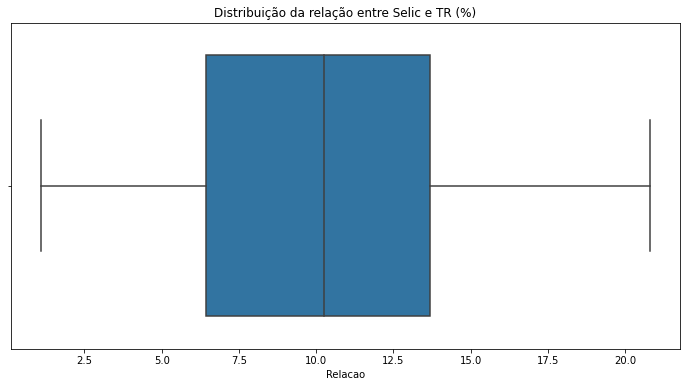

In [60]:
graf1 = sns.boxplot(tabela.query('TR != 0')['Relacao'].round(2))
graf1.figure.set_size_inches(12,6)
plt.title('Distribuição da relação entre Selic e TR (%)')

Text(0.5, 1.0, 'Distribuição da Relação entre Tr x Selic')

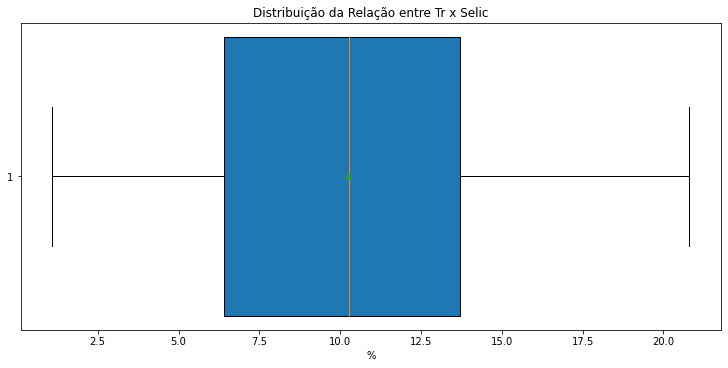

In [92]:
fig, graf1 = plt.subplots(figsize=(10, 5), layout='constrained')
graf1.boxplot(tabela.query('TR != 0')['Relacao'].round(2), vert=False, patch_artist=True, widths=1.5, showmeans=True)
graf1.set_xlabel('%')
graf1.set_title('Distribuição da Relação entre Tr x Selic')

<AxesSubplot:>

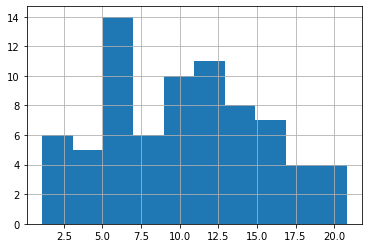

In [93]:
tabela.query('TR != 0')['Relacao'].round(2).hist()

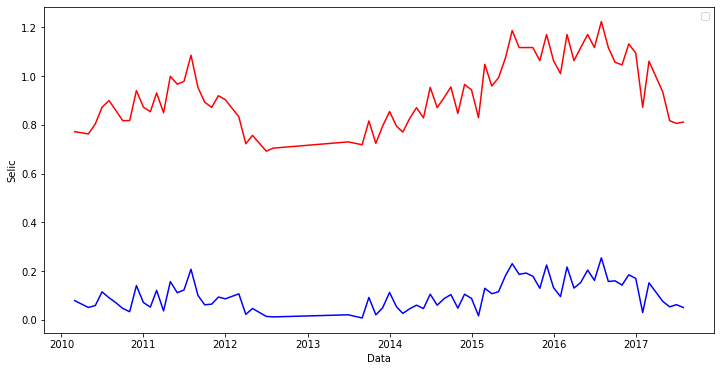

In [43]:
# Gráfico 1
graf2 = sns.lineplot(x = 'Data', y = 'Selic', data = tabela.query('TR != 0'), color='r')
graf2.figure.set_size_inches(12,6)
graf3 = sns.lineplot(x = 'Data', y = 'TR', data = tabela.query('TR != 0'), color='b')
graf3.figure.set_size_inches(12,6)
plt.

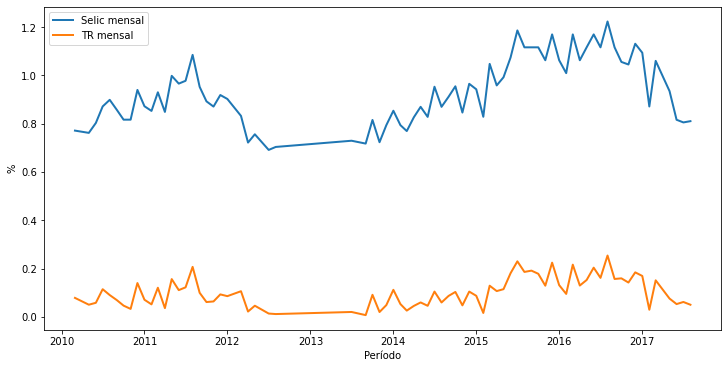

In [62]:
fig, graf2 = plt.subplots(figsize=(10, 5), layout='constrained')
graf2.plot('Data', 'Selic', label='Selic mensal', data=tabela.query('TR != 0'), linewidth=2.0)
graf2.plot('Data', 'TR', label='TR mensal', data=tabela.query('TR != 0'), linewidth=2.0)
graf2.set_xlabel('Período')
graf2.set_ylabel('%')
graf2.legend()

In [ ]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.

In [22]:
tabela.query('TR == 0 and Selic > 0.68')['Selic'].describe()

count    3.000000
mean     0.755767
std      0.038783
min      0.715600
25%      0.737150
50%      0.758700
75%      0.775850
max      0.793000
Name: Selic, dtype: float64

In [23]:
tabela.query('TR == 0 and Selic >= 0.691700')

,Data,TR,Selic,Relacao,Var_TR,Var_Selic
25,2012-02-01,0.0,0.7587,0.0,-100.0,-15.942832
43,2013-08-01,0.0,0.7156,0.0,-100.0,-1.932301
87,2017-04-01,0.0,0.7930,0.0,-100.0,-25.209846


In [24]:
tabela.query('Data >= "2013-01-01" and Data <= "2013-12-01"')

,Data,TR,Selic,Relacao,Var_TR,Var_Selic
36,2013-01-01,0.0000,0.6105,0.000000,0.000000,9.154300
37,2013-02-01,0.0000,0.4992,0.000000,0.000000,-18.230958
38,2013-03-01,0.0000,0.5548,0.000000,0.000000,11.137821
39,2013-04-01,0.0000,0.6188,0.000000,0.000000,11.535689
40,2013-05-01,0.0000,0.6039,0.000000,0.000000,-2.407886
41,2013-06-01,0.0000,0.6102,0.000000,0.000000,1.043219
42,2013-07-01,0.0209,0.7297,2.864191,0.000000,19.583743
43,2013-08-01,0.0000,0.7156,0.000000,-100.000000,-1.932301
44,2013-09-01,0.0079,0.7179,1.100432,0.000000,0.321409
45,2013-10-01,0.0920,0.8157,11.278656,1064.556962,13.623067


In [56]:
resumo2 = pd.DataFrame(round(tabela.query('TR != 0')['Selic'].describe(),2))
resumo2.columns = ['Selic']
resumo2 = resumo2[1:]
resumo2.index = ['Média','Desvio padrão', 'Mínimo', '25%', '50%','75%','Máximo']
resumo2
# tabela.query('TR != 0')['Selic'].describe()

,Selic
Média,0.93
Desvio padrão,0.14
Mínimo,0.69
25%,0.82
50%,0.91
75%,1.06
Máximo,1.22


In [26]:
tabela.query('TR != 0')['Relacao'].describe()

count    75.000000
mean     10.235161
std       4.923134
min       1.100432
25%       6.421565
50%      10.264386
75%      13.697009
max      20.804382
Name: Relacao, dtype: float64

In [27]:
tabela.query('TR != 0')['Selic'].value_counts(bins = 10, sort=False)

(0.69, 0.745]      6
(0.745, 0.798]     6
(0.798, 0.851]    13
(0.851, 0.904]    12
(0.904, 0.958]     9
(0.958, 1.011]     7
(1.011, 1.064]     7
(1.064, 1.117]     9
(1.117, 1.17]      4
(1.17, 1.223]      2
Name: Selic, dtype: int64

<AxesSubplot:>

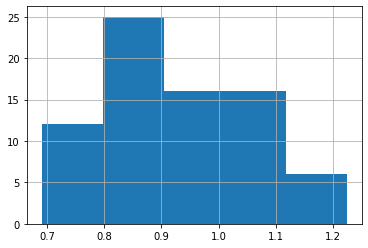

In [28]:
tabela.query('TR != 0')['Selic'].hist(bins=5)

In [29]:
tabela.query('TR != 0')['Relacao'].median()

10.264385692068432

In [30]:
tabela2 = pd.DataFrame(tabela[['Data', 'TR', 'Selic']])
tabela2

,Data,TR,Selic
0,2010-01-01,0.0000,0.6706
1,2010-02-01,0.0000,0.6034
2,2010-03-01,0.0792,0.7716
3,2010-04-01,0.0000,0.6761
4,2010-05-01,0.0510,0.7622
...,...,...,...
91,2017-08-01,0.0509,0.8107
92,2017-09-01,0.0000,0.6458
93,2017-10-01,0.0000,0.6228
94,2017-11-01,0.0000,0.5756


<AxesSubplot:xlabel='Relacao', ylabel='Count'>

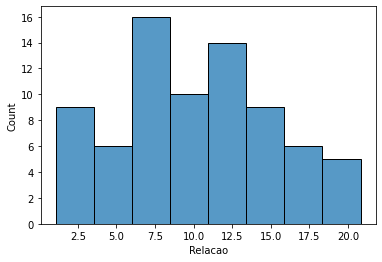

In [31]:
sns.histplot(data = tabela.query('TR != 0')['Relacao'])